In [13]:
import numpy as np
from svm_helper import (
    svm_kfold_eval,
    svm_train,
    average_error
)
from process_data_helper import (
    process_training_data,
    process_testing_data,
    load_data,
    write_predictions
)

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Load in the training data, and process it (separate data and labels, normalize it, and add bias).

train_data = load_data("../data/training_data.txt")
X, Y = process_training_data(train_data, 'l1', add_bias=True)

In [15]:
# Set range of regularization coefficients
alpha = np.array([0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1])

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show>

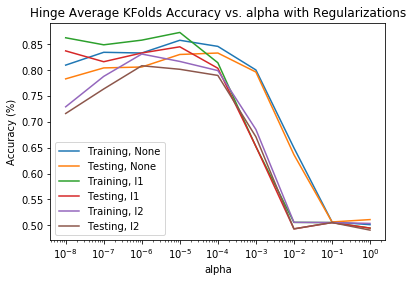

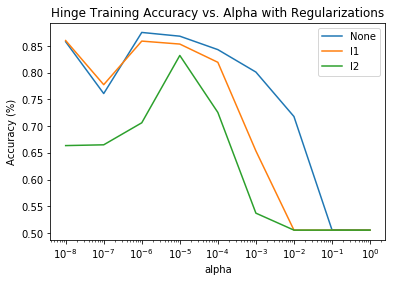

In [16]:
# Hinge Loss Iteration

# Arrays to store accuracies
train_avg_n = np.zeros(alpha.shape)
test_avg_n = np.zeros(alpha.shape)
atrain_full_n = np.zeros(alpha.shape)
train_avg_l1 = np.zeros(alpha.shape)
test_avg_l1 = np.zeros(alpha.shape)
atrain_full_l1 = np.zeros(alpha.shape)
train_avg_l2 = np.zeros(alpha.shape)
test_avg_l2 = np.zeros(alpha.shape)
atrain_full_l2 = np.zeros(alpha.shape)


for i in range(alpha.size):
    
    # No regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='hinge',penalty='none',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_n[i] = average_error(train_acc)
    test_avg_n[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    atrain_full_n[i], clf = svm_train(X,Y,loss='hinge',penalty='none',alpha=alpha[i], max_iter=1000,tol=1e-3)

    # l1 regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='hinge',penalty='l1',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_l1[i] = average_error(train_acc)
    test_avg_l1[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    atrain_full_l1[i], clf = svm_train(X,Y,loss='hinge',penalty='l1',alpha=alpha[i], max_iter=1000,tol=1e-3)
    
    # l2 regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='hinge',penalty='l2',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_l2[i] = average_error(train_acc)
    test_avg_l2[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    atrain_full_l2[i], clf = svm_train(X,Y,loss='hinge',penalty='l2',alpha=alpha[i], max_iter=1000,tol=1e-3)
    
plt.figure()
plt.semilogx(alpha,train_avg_n,label='Training, None')
plt.semilogx(alpha,test_avg_n,label='Testing, None')
plt.semilogx(alpha,train_avg_l1,label='Training, l1')
plt.semilogx(alpha,test_avg_l1,label='Testing, l1')
plt.semilogx(alpha,train_avg_l2,label='Training, l2')
plt.semilogx(alpha,test_avg_l2,label='Testing, l2')
plt.xlabel('alpha')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Hinge Average KFolds Accuracy vs. alpha with Regularizations')
plt.savefig('hinge_k.eps', format='eps', dpi=1000)
plt.show

plt.figure()
plt.semilogx(alpha,atrain_full_n,label='None')
plt.semilogx(alpha,atrain_full_l1,label='l1')
plt.semilogx(alpha,atrain_full_l2,label='l2')
plt.xlabel('alpha')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Hinge Training Accuracy vs. Alpha with Regularizations')
plt.savefig('hinge_full.eps', format='eps', dpi=1000)
plt.show


C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show>

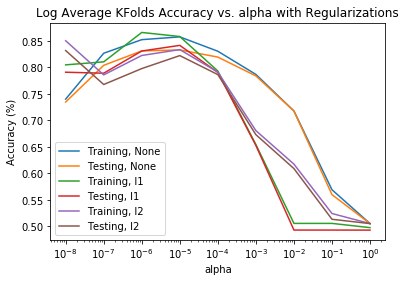

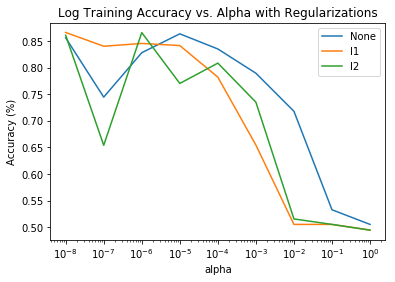

In [17]:
# Log Loss Iteration

# Arrays to store accuracies
train_avg_n = np.zeros(alpha.shape)
test_avg_n = np.zeros(alpha.shape)
btrain_full_n = np.zeros(alpha.shape)
train_avg_l1 = np.zeros(alpha.shape)
test_avg_l1 = np.zeros(alpha.shape)
btrain_full_l1 = np.zeros(alpha.shape)
train_avg_l2 = np.zeros(alpha.shape)
test_avg_l2 = np.zeros(alpha.shape)
btrain_full_l2 = np.zeros(alpha.shape)


for i in range(alpha.size):
    
    # No regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='log',penalty='none',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_n[i] = average_error(train_acc)
    test_avg_n[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    btrain_full_n[i], clf = svm_train(X,Y,loss='log',penalty='none',alpha=alpha[i], max_iter=1000,tol=1e-3)

    # l1 regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='log',penalty='l1',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_l1[i] = average_error(train_acc)
    test_avg_l1[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    btrain_full_l1[i], clf = svm_train(X,Y,loss='log',penalty='l1',alpha=alpha[i], max_iter=1000,tol=1e-3)
    
    # l2 regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='log',penalty='l2',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_l2[i] = average_error(train_acc)
    test_avg_l2[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    btrain_full_l2[i], clf = svm_train(X,Y,loss='log',penalty='l2',alpha=alpha[i], max_iter=1000,tol=1e-3)
    
plt.figure()
plt.semilogx(alpha,train_avg_n,label='Training, None')
plt.semilogx(alpha,test_avg_n,label='Testing, None')
plt.semilogx(alpha,train_avg_l1,label='Training, l1')
plt.semilogx(alpha,test_avg_l1,label='Testing, l1')
plt.semilogx(alpha,train_avg_l2,label='Training, l2')
plt.semilogx(alpha,test_avg_l2,label='Testing, l2')
plt.xlabel('alpha')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Log Average KFolds Accuracy vs. alpha with Regularizations')
plt.savefig('log_k.eps', format='eps', dpi=1000)
plt.show

plt.figure()
plt.semilogx(alpha,btrain_full_n,label='None')
plt.semilogx(alpha,btrain_full_l1,label='l1')
plt.semilogx(alpha,btrain_full_l2,label='l2')
plt.xlabel('alpha')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Log Training Accuracy vs. Alpha with Regularizations')
plt.savefig('log_full.eps', format='eps', dpi=1000)
plt.show

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


<function matplotlib.pyplot.show>

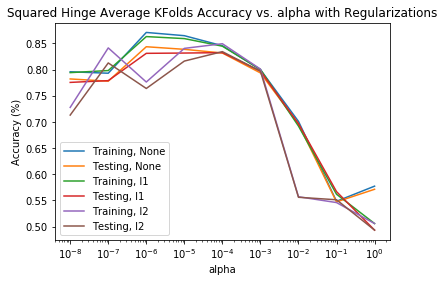

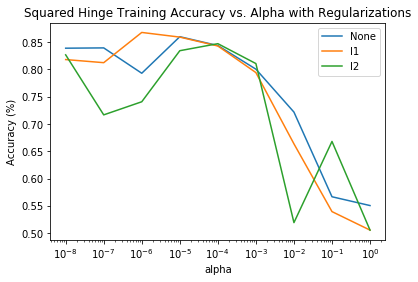

In [18]:
# Squared Hinge Loss Iteration

# Arrays to store accuracies
train_avg_n = np.zeros(alpha.shape)
test_avg_n = np.zeros(alpha.shape)
ctrain_full_n = np.zeros(alpha.shape)
train_avg_l1 = np.zeros(alpha.shape)
test_avg_l1 = np.zeros(alpha.shape)
ctrain_full_l1 = np.zeros(alpha.shape)
train_avg_l2 = np.zeros(alpha.shape)
test_avg_l2 = np.zeros(alpha.shape)
ctrain_full_l2 = np.zeros(alpha.shape)


for i in range(alpha.size):
    
    # No regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='squared_hinge',penalty='none',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_n[i] = average_error(train_acc)
    test_avg_n[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    ctrain_full_n[i], clf = svm_train(X,Y,loss='squared_hinge',penalty='none',alpha=alpha[i], max_iter=1000,tol=1e-3)

    # l1 regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='squared_hinge',penalty='l1',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_l1[i] = average_error(train_acc)
    test_avg_l1[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    ctrain_full_l1[i], clf = svm_train(X,Y,loss='squared_hinge',penalty='l1',alpha=alpha[i], max_iter=1000,tol=1e-3)
    
    # l2 regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='squared_hinge',penalty='l2',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_l2[i] = average_error(train_acc)
    test_avg_l2[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    ctrain_full_l2[i], clf = svm_train(X,Y,loss='squared_hinge',penalty='l2',alpha=alpha[i], max_iter=1000,tol=1e-3)
    
plt.figure()
plt.semilogx(alpha,train_avg_n,label='Training, None')
plt.semilogx(alpha,test_avg_n,label='Testing, None')
plt.semilogx(alpha,train_avg_l1,label='Training, l1')
plt.semilogx(alpha,test_avg_l1,label='Testing, l1')
plt.semilogx(alpha,train_avg_l2,label='Training, l2')
plt.semilogx(alpha,test_avg_l2,label='Testing, l2')
plt.xlabel('alpha')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Squared Hinge Average KFolds Accuracy vs. alpha with Regularizations')
plt.savefig('square_hinge_k.eps', format='eps', dpi=1000)
plt.show

plt.figure()
plt.semilogx(alpha,ctrain_full_n,label='None')
plt.semilogx(alpha,ctrain_full_l1,label='l1')
plt.semilogx(alpha,ctrain_full_l2,label='l2')
plt.xlabel('alpha')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Squared Hinge Training Accuracy vs. Alpha with Regularizations')
plt.savefig('square_hinge_full.eps', format='eps', dpi=1000)
plt.show

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show>

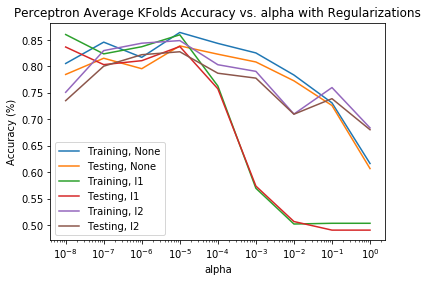

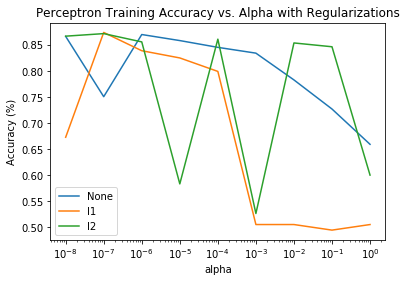

In [19]:
# Perceptron Loss Iteration

# Arrays to store accuracies
train_avg_n = np.zeros(alpha.shape)
test_avg_n = np.zeros(alpha.shape)
dtrain_full_n = np.zeros(alpha.shape)
train_avg_l1 = np.zeros(alpha.shape)
test_avg_l1 = np.zeros(alpha.shape)
dtrain_full_l1 = np.zeros(alpha.shape)
train_avg_l2 = np.zeros(alpha.shape)
test_avg_l2 = np.zeros(alpha.shape)
dtrain_full_l2 = np.zeros(alpha.shape)


for i in range(alpha.size):
    
    # No regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='perceptron',penalty='none',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_n[i] = average_error(train_acc)
    test_avg_n[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    dtrain_full_n[i], clf = svm_train(X,Y,loss='perceptron',penalty='none',alpha=alpha[i], max_iter=1000,tol=1e-3)

    # l1 regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='perceptron',penalty='l1',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_l1[i] = average_error(train_acc)
    test_avg_l1[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    dtrain_full_l1[i], clf = svm_train(X,Y,loss='perceptron',penalty='l1',alpha=alpha[i], max_iter=1000,tol=1e-3)
    
    # l2 regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='perceptron',penalty='l2',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_l2[i] = average_error(train_acc)
    test_avg_l2[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    dtrain_full_l2[i], clf = svm_train(X,Y,loss='perceptron',penalty='l2',alpha=alpha[i], max_iter=1000,tol=1e-3)
    
plt.figure()
plt.semilogx(alpha,train_avg_n,label='Training, None')
plt.semilogx(alpha,test_avg_n,label='Testing, None')
plt.semilogx(alpha,train_avg_l1,label='Training, l1')
plt.semilogx(alpha,test_avg_l1,label='Testing, l1')
plt.semilogx(alpha,train_avg_l2,label='Training, l2')
plt.semilogx(alpha,test_avg_l2,label='Testing, l2')
plt.xlabel('alpha')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Perceptron Average KFolds Accuracy vs. alpha with Regularizations')
plt.savefig('perceptron_k.eps', format='eps', dpi=1000)
plt.show

plt.figure()
plt.semilogx(alpha,dtrain_full_n,label='None')
plt.semilogx(alpha,dtrain_full_l1,label='l1')
plt.semilogx(alpha,dtrain_full_l2,label='l2')
plt.xlabel('alpha')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Perceptron Training Accuracy vs. Alpha with Regularizations')
plt.savefig('perceptron_full.eps', format='eps', dpi=1000)
plt.show

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


<function matplotlib.pyplot.show>

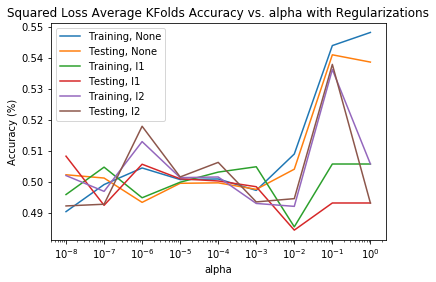

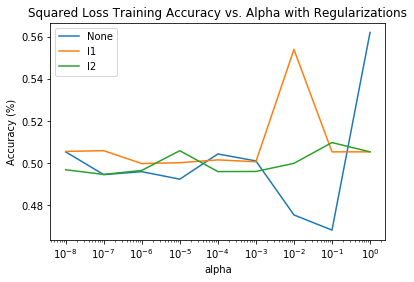

In [20]:
# Squared Loss Iteration

# Arrays to store accuracies
train_avg_n = np.zeros(alpha.shape)
test_avg_n = np.zeros(alpha.shape)
etrain_full_n = np.zeros(alpha.shape)
train_avg_l1 = np.zeros(alpha.shape)
test_avg_l1 = np.zeros(alpha.shape)
etrain_full_l1 = np.zeros(alpha.shape)
train_avg_l2 = np.zeros(alpha.shape)
test_avg_l2 = np.zeros(alpha.shape)
etrain_full_l2 = np.zeros(alpha.shape)


for i in range(alpha.size):
    
    # No regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='squared_loss',penalty='none',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_n[i] = average_error(train_acc)
    test_avg_n[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    etrain_full_n[i], clf = svm_train(X,Y,loss='squared_loss',penalty='none',alpha=alpha[i], max_iter=1000,tol=1e-3)

    # l1 regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='squared_loss',penalty='l1',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_l1[i] = average_error(train_acc)
    test_avg_l1[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    etrain_full_l1[i], clf = svm_train(X,Y,loss='squared_loss',penalty='l1',alpha=alpha[i], max_iter=1000,tol=1e-3)
    
    # l2 regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='squared_loss',penalty='l2',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_l2[i] = average_error(train_acc)
    test_avg_l2[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    etrain_full_l2[i], clf = svm_train(X,Y,loss='squared_loss',penalty='l2',alpha=alpha[i], max_iter=1000,tol=1e-3)
    
plt.figure()
plt.semilogx(alpha,train_avg_n,label='Training, None')
plt.semilogx(alpha,test_avg_n,label='Testing, None')
plt.semilogx(alpha,train_avg_l1,label='Training, l1')
plt.semilogx(alpha,test_avg_l1,label='Testing, l1')
plt.semilogx(alpha,train_avg_l2,label='Training, l2')
plt.semilogx(alpha,test_avg_l2,label='Testing, l2')
plt.xlabel('alpha')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Squared Loss Average KFolds Accuracy vs. alpha with Regularizations')
plt.savefig('squared_loss_k.eps', format='eps', dpi=1000)
plt.show

plt.figure()
plt.semilogx(alpha,etrain_full_n,label='None')
plt.semilogx(alpha,etrain_full_l1,label='l1')
plt.semilogx(alpha,etrain_full_l2,label='l2')
plt.xlabel('alpha')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Squared Loss Training Accuracy vs. Alpha with Regularizations')
plt.savefig('squared_loss_full.eps', format='eps', dpi=1000)
plt.show

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show>

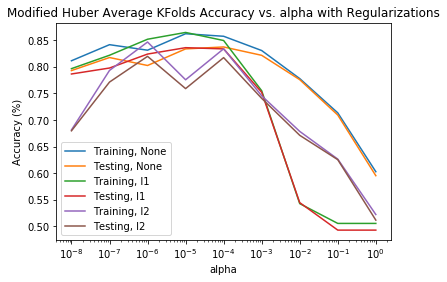

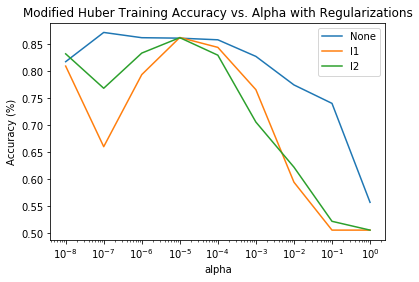

In [21]:
# Modified Huber Iteration
# Arrays to store accuracies
train_avg_n = np.zeros(alpha.shape)
test_avg_n = np.zeros(alpha.shape)
ftrain_full_n = np.zeros(alpha.shape)
train_avg_l1 = np.zeros(alpha.shape)
test_avg_l1 = np.zeros(alpha.shape)
ftrain_full_l1 = np.zeros(alpha.shape)
train_avg_l2 = np.zeros(alpha.shape)
test_avg_l2 = np.zeros(alpha.shape)
ftrain_full_l2 = np.zeros(alpha.shape)


for i in range(alpha.size):
    
    # No regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='modified_huber',penalty='none',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_n[i] = average_error(train_acc)
    test_avg_n[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    ftrain_full_n[i], clf = svm_train(X,Y,loss='modified_huber',penalty='none',alpha=alpha[i], max_iter=1000,tol=1e-3)

    # l1 regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='modified_huber',penalty='l1',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_l1[i] = average_error(train_acc)
    test_avg_l1[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    ftrain_full_l1[i], clf = svm_train(X,Y,loss='modified_huber',penalty='l1',alpha=alpha[i], max_iter=1000,tol=1e-3)
    
    # l2 regularization
    
    # Compute the KFolds accuracies
    train_acc, test_acc, clf = svm_kfold_eval(X,Y,folds=5,loss='modified_huber',penalty='l2',alpha=alpha[i], max_iter=1000,tol=1e-3)
    train_avg_l2[i] = average_error(train_acc)
    test_avg_l2[i] = average_error(test_acc)
    
    # Compute the full dataset training error
    ftrain_full_l2[i], clf = svm_train(X,Y,loss='modified_huber',penalty='l2',alpha=alpha[i], max_iter=1000,tol=1e-3)
    
plt.figure()
plt.semilogx(alpha,train_avg_n,label='Training, None')
plt.semilogx(alpha,test_avg_n,label='Testing, None')
plt.semilogx(alpha,train_avg_l1,label='Training, l1')
plt.semilogx(alpha,test_avg_l1,label='Testing, l1')
plt.semilogx(alpha,train_avg_l2,label='Training, l2')
plt.semilogx(alpha,test_avg_l2,label='Testing, l2')
plt.xlabel('alpha')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Modified Huber Average KFolds Accuracy vs. alpha with Regularizations')
plt.savefig('mod_huber_k.eps', format='eps', dpi=1000)
plt.show

plt.figure()
plt.semilogx(alpha,ftrain_full_n,label='None')
plt.semilogx(alpha,ftrain_full_l1,label='l1')
plt.semilogx(alpha,ftrain_full_l2,label='l2')
plt.xlabel('alpha')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Modified Huber Training Accuracy vs. Alpha with Regularizations')
plt.savefig('mod_huber_full.eps', format='eps', dpi=1000)
plt.show



<function matplotlib.pyplot.show>

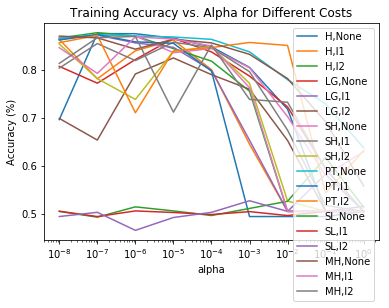

In [11]:
plt.figure()
plt.semilogx(alpha,atrain_full_n,label='H,None')
plt.semilogx(alpha,atrain_full_l1,label='H,l1')
plt.semilogx(alpha,atrain_full_l2,label='H,l2')
plt.semilogx(alpha,btrain_full_n,label='LG,None')
plt.semilogx(alpha,btrain_full_l1,label='LG,l1')
plt.semilogx(alpha,btrain_full_l2,label='LG,l2')
plt.semilogx(alpha,ctrain_full_n,label='SH,None')
plt.semilogx(alpha,ctrain_full_l1,label='SH,l1')
plt.semilogx(alpha,ctrain_full_l2,label='SH,l2')
plt.semilogx(alpha,dtrain_full_n,label='PT,None')
plt.semilogx(alpha,dtrain_full_l1,label='PT,l1')
plt.semilogx(alpha,dtrain_full_l2,label='PT,l2')
plt.semilogx(alpha,etrain_full_n,label='SL,None')
plt.semilogx(alpha,etrain_full_l1,label='SL,l1')
plt.semilogx(alpha,etrain_full_l2,label='SL,l2')
plt.semilogx(alpha,ftrain_full_n,label='MH,None')
plt.semilogx(alpha,ftrain_full_l1,label='MH,l1')
plt.semilogx(alpha,ftrain_full_l2,label='MH,l2')
plt.xlabel('alpha')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training Accuracy vs. Alpha for Different Costs')
plt.show

<function matplotlib.pyplot.show>

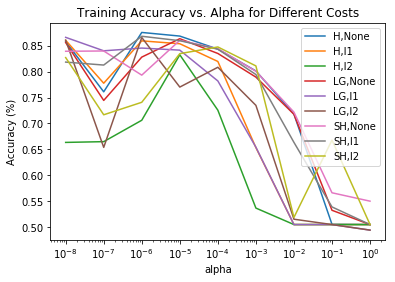

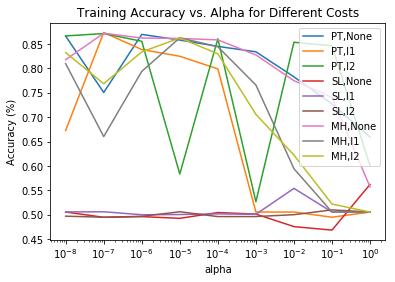

In [22]:
plt.figure()
plt.semilogx(alpha,atrain_full_n,label='H,None')
plt.semilogx(alpha,atrain_full_l1,label='H,l1')
plt.semilogx(alpha,atrain_full_l2,label='H,l2')
plt.semilogx(alpha,btrain_full_n,label='LG,None')
plt.semilogx(alpha,btrain_full_l1,label='LG,l1')
plt.semilogx(alpha,btrain_full_l2,label='LG,l2')
plt.semilogx(alpha,ctrain_full_n,label='SH,None')
plt.semilogx(alpha,ctrain_full_l1,label='SH,l1')
plt.semilogx(alpha,ctrain_full_l2,label='SH,l2')
plt.xlabel('alpha')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training Accuracy vs. Alpha for Different Costs')
plt.savefig('full_set_1.eps', format='eps', dpi=1000)
plt.show

plt.figure()
plt.semilogx(alpha,dtrain_full_n,label='PT,None')
plt.semilogx(alpha,dtrain_full_l1,label='PT,l1')
plt.semilogx(alpha,dtrain_full_l2,label='PT,l2')
plt.semilogx(alpha,etrain_full_n,label='SL,None')
plt.semilogx(alpha,etrain_full_l1,label='SL,l1')
plt.semilogx(alpha,etrain_full_l2,label='SL,l2')
plt.semilogx(alpha,ftrain_full_n,label='MH,None')
plt.semilogx(alpha,ftrain_full_l1,label='MH,l1')
plt.semilogx(alpha,ftrain_full_l2,label='MH,l2')
plt.xlabel('alpha')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training Accuracy vs. Alpha for Different Costs')
plt.savefig('full_set_2.eps', format='eps', dpi=1000)
plt.show